### Theory for the Neumann boundary condition

First we'll say we know the rate of growth of ice, $g_{ice} \approx 1-2 \mu m / s$. That means in terms of mass/area/time, we have 

$$
g'_{ice} = {dmass \over {A dt}} = \rho_{ice} g_{ice} \ \ \ \ (1)
$$

Now if the ice is growing, the amount of water in the air layer above the ice must be getting changed too, so 

$$
g'_{vap} = {dmass \over {A dt}} \ \ \ \ (2)
$$

The change in mass of vapor for a given volume can be expressed, with the ideal gas law, as 

$$
dmass = M_{vap} dn_{vap} = M_{vap} {V dP_{vap} \over RT} \ \ \ \ (3)
$$

so now we have

$$
g'_{vap} = {M_{vap} {V dP_{vap} \over RT} \over {A dt}} \ \ \ \ (4)
$$

Since the volume of the gas phase is $A \Delta y$, this becomes

$$
g'_{vap} = {M_{vap} {A \Delta y \ dP_{vap} \over RT} \over {A dt}}  = {M_{vap} \Delta y \over RT} {dP_{vap} \over dt}\ \ \ \ (5)
$$

Since $g'_{vap}=-g'_{ice}$, we have ${M_{vap} \Delta y \over RT} {dP_{vap} \over dt} = -\rho_{ice} g_{ice}$

$$
{\partial P_{vap} \over \partial t} =  -\rho_{ice} g_{ice}{RT \over M_{vap} \Delta y}  \ \ \ \ (6)
$$

In [1]:
import numpy as np
import matplotlib.pylab as plt
from copy import copy as cp
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import sys
sys.path.append('..')
import VFDstuff as VFD
import math

In [2]:
%matplotlib inline

### Functions 
The coefficients m and b below are based on a fit of data from https://www.engineeringtoolbox.com/air-diffusion-coefficient-gas-mixture-temperature-d_2010.html.

In [3]:
# Units
distance_unit = 'micrometer'
pressure_unit = 'pascal'
time_unit = 'microsecond'

# Times
#tmax = AssignQuantity(2,time_unit)
#tmax = AssignQuantity(10,time_unit)
tmax = AssignQuantity(.5,time_unit)

# Setting ice parameters
sigma0 = 0.2
print('sigma0 = ',sigma0)

# The far-field supersaturation
sigmaI_far_field = 0.3

# Temperature and pressure
Temp = AssignQuantity(240,'kelvin')
Pressure = AssignQuantity(50,'pascal')

# Converting to the desired pressure unit
Pressure.ito(pressure_unit)
print('Pressure = ', Pressure)
print('Temperature = ',Temp)


# Checking on the plausibility of this growth rate
nu_kin = VFD.get_nu_kin(Temp,AssignQuantity)
print('g_ice should be smaller than sigmaI_far_field x nu_kin ...')
print('nu_kin = ', nu_kin)
print('sigmaI_far_field x nu_kin = ', sigmaI_far_field*nu_kin)

sigma0 =  0.2
Pressure =  50 pascal
Temperature =  240 kelvin
g_ice should be smaller than sigmaI_far_field x nu_kin ...
nu_kin =  39.341788071548116 micrometer / second
sigmaI_far_field x nu_kin =  11.802536421464435 micrometer / second


In [4]:
g_ice = AssignQuantity(2,'micrometer/second')
g_iceA = g_ice
g_iceB = g_ice
g_iceC = g_ice
g_iceD = g_ice
g_iceE = g_ice
g_iceF = g_ice

In [5]:
# Box size
nx = ny = 353
boxsize = 1000
xmax = AssignQuantity(boxsize,distance_unit)
ymax = AssignQuantity(boxsize,distance_unit)
x = np.linspace(0,xmax,nx); dx = x[1]-x[0]; print('dx', dx)
y = np.linspace(0,ymax,ny); dy = y[1]-y[0]; print('dy',dy)
dx2 = dx**2
dy2 = dy**2
nxmid = int(nx/2); # print('nxmid =', nxmid); # print('x(nxmid) =',x[nxmid])
nymid = int(ny/2)
x = x-x[nxmid]
y = y-y[nymid]

dx 2.840909090909091 micrometer
dy 2.840909090909091 micrometer


### Diffusion coefficient
See https://acp.copernicus.org/articles/20/12569/2020/#&gid=1&pid=1 for cirrus cloud conditions
See https://www.engineeringtoolbox.com/air-diffusion-coefficient-gas-mixture-temperature-d_2010.html for Diffusion coefficient calculations

In [6]:
# Compute diffusion coefficient of water through air at this temperature
# This is using trends from engineering toolbox, with the log-log correction
D = VFD.getDofTP(Temp,Pressure,AssignQuantity); print('loglog method says D = ', D)

# Getting a suitable time step
dt = (dx2+dy2)/D/10; print('dt = ', dt)

# Computing effective diffusion coefficents - which should be dimensionless
Dxeff = D*dt/dx2; print('Dxeff = ', Dxeff)
Deff = Dxeff

D0 =  21.893732126411837
loglog method says D =  34908.31943863489 micrometer ** 2 / microsecond
dt =  4.623977660681983e-05 microsecond
Dxeff =  0.2 dimensionless


In [7]:
# Calculating the Neumann condition at the vapor/ice boundary (starting with ice density)
rho_ice = AssignQuantity(0.9,'g/cm^3')
Mvap = AssignQuantity(18,'g/mol')
R = AssignQuantity(8.314,'J/mol/kelvin')

# kappa
kappa = rho_ice*g_ice*R*Temp/(Mvap*dy); kappa.ito(pressure_unit+'/'+time_unit)
# kappax_left = rho_ice*g_icex_left*R*Temp/(Mvap*dy); kappax_left.ito(pressure_unit+'/'+time_unit)
# kappax_right = rho_ice*g_icex_right*R*Temp/(Mvap*dy); kappax_right.ito(pressure_unit+'/'+time_unit)
# kappay = rho_ice*g_icey*R*Temp/(Mvap*dx); kappay.ito(pressure_unit+'/'+time_unit)
# # print('kappax = ',kappax)
# print('kappax_left = ',kappax_left)
# print('kappax_right = ',kappax_right)
# print('kappyy = ',kappay)

# Neumann
uneumann = kappa*dt
# uneumannx_left = kappax_left*dt
# uneumannx_right = kappax_right*dt
# uneumanny = kappay*dt
# # print('uneumannx = ',uneumannx)
# print('uneumannx_left = ',uneumannx_left)
# print('uneumannx_right = ',uneumannx_right)
# print('uneumanny = ',uneumanny)
# # uneumannx_mag = uneumannx.magnitude
uneumann_mag = uneumann.magnitude
# uneumannx_left_mag = uneumannx_left.magnitude
# uneumannx_right_mag = uneumannx_right.magnitude
# uneumanny_mag = uneumanny.magnitude

In [8]:
# Calculating the dirichlet conditions at the far-field boundary
sigmaII_far_field = sigmaI_far_field - sigma0
print('sigmaI_far_field = ', sigmaI_far_field)
print('sigmaII_far_field = ', sigmaII_far_field)

# Converting this into pressures
P3 = AssignQuantity(611,'Pa')
T3 = AssignQuantity(273,'kelvin')
Delta_H_sub = AssignQuantity(50,'kJ/mol')
P_vapor_eq = P3*np.exp(-Delta_H_sub/R*(1/Temp-1/T3)); print('Vapor pressure at this temperature = ', P_vapor_eq)

udirichlet = P_vapor_eq*(sigmaI_far_field+1)
print('udirichlet = ', udirichlet)

# Making dimensionless variables for efficiency
udirichlet_mag = udirichlet.magnitude

sigmaI_far_field =  0.3
sigmaII_far_field =  0.09999999999999998
Vapor pressure at this temperature =  29.55023347583504 pascal
udirichlet =  38.41530351858555 pascal


In [9]:
# This restarts the array accumulation
Lx_list = np.array([])
Ly_list = np.array([])
uslicex0_list = np.array([])
uslicey0_list = np.array([])
uslicex_list = []
uslicey_list = []
c_rx_percent_list = np.array([])
c_ry_percent_list = np.array([])

# Looping
# Ldesired_list = AssignQuantity(np.linspace(10,100,3),distance_unit)
# Ldesired_list = AssignQuantity(np.linspace(50,50,1),distance_unit)
# Ldesired_list = AssignQuantity(np.linspace(150,150,1),distance_unit)
# Ldesired_list = AssignQuantity(np.arange(20,105,10),distance_unit)
# Ldesired_list = AssignQuantity(np.arange(20,51,10),distance_unit)
# Ldesired_list = AssignQuantity(np.arange(49,57,3),distance_unit)
Ldesired_list = AssignQuantity(np.linspace(100,100,1),distance_unit)
aspect_ratio = 1
ntimes = int(tmax/dt)
print('Integrating steps = ', ntimes)

print('Ldesired_list = ', Ldesired_list)
nL = len(Ldesired_list) 
print('Integrating out to ', ntimes*dt) # This is a check -- it should be very close to the tmax specified above

Integrating steps =  10813
Ldesired_list =  [100.0] micrometer
Integrating out to  0.4999907044495428 microsecond


In [10]:
fontsize = 25
color = 'k'
linewidth = 4
markersize = 10

In [11]:
#my own plot

#assigning box values
# Box size
nx = 353
ny = 353
xmax = AssignQuantity(1000,distance_unit)
ymax = AssignQuantity(1000,distance_unit)
x = np.linspace(0,xmax,nx); dx = x[1]-x[0]; print('dx', dx)
y = np.linspace(0,ymax,ny); dy = y[1]-y[0]; print('dy',dy)
dx2 = dx**2
dy2 = dy**2
nxmid = int(nx/2); # print('nxmid =', nxmid); # print('x(nxmid) =',x[nxmid])
nymid = int(ny/2)
x = x-x[nxmid]
y = y-y[nymid]

#assigning stuff
Lindex = 0
for Ldesired in Ldesired_list:
    
    print('Ldesired',Ldesired)
    
    # Define the box inside
    Ldesiredx = Ldesired # Doesn't always work out to this because the grid is discretized
    boxradx = int(Ldesiredx/dx)
    Lx = boxradx*dx;
    
    Ldesiredy = Ldesiredx*aspect_ratio
    boxrady = int(Ldesiredy/dy)
    Ly = boxrady*dy;
    
#hexagon code    
    #making a b value
    print("******************")
    sine=math.sin(math.pi/3)
    print('sine= ', sine)
    Ldesiredy_new = 2*Ldesired*sine
    print('Ldesiredy_new= ',Ldesiredy_new)
    boxrady_new = int(Ldesiredy_new/dy)
    print('boxrady_new= ',boxrady_new)
    Ly_new = boxrady_new*dy
    print('Ly_new= ',Ly_new)
    #new bounds
    iyboxmin_new = nymid-boxrady_new
    iyboxmax_new = nymid+boxrady_new
    print('    new box length (y) = ', iyboxmax_new-iyboxmin_new)
    #slicing
    iybox_new = slice(iyboxmin_new,iyboxmax_new);  print('iybox_new= ',iybox_new)
    
    #making a c value
    Ldesiredx_new = 2*Ldesired
    print('Ldesiredx_new= ',Ldesiredx_new)
    boxradx_new = int(Ldesiredx_new/dx)
    print('boxradx_new= ',boxradx_new)
    Lx_new = boxradx_new*dx
    print('Lx_new= ',Lx_new)
    #new bounds
    ixboxmin_new = nxmid-boxradx_new
    ixboxmax_new = nxmid+boxradx_new
    print('    new box length (x) = ', ixboxmax_new-ixboxmin_new)
    #slicing
    ixbox_new = slice(ixboxmin_new,ixboxmax_new);  print('ixbox_new= ', ixbox_new)
    
    #take the middle index point and go the index points of our crystal side to the left and to the right
    ixboxmin = nxmid-boxradx
    ixboxmax = nxmid+boxradx
    print('    Working on Lxdesired, Lx = ', Ldesired, Lx)
    print('    box length (x) = ', ixboxmax-ixboxmin)
    #doing the same thing but in the y direction
    iyboxmin = nymid-boxrady
    iyboxmax = nymid+boxrady
    print('    box length (y) = ', iyboxmax-iyboxmin)
    
     #new slices
    ixbox_newright = slice(ixboxmax,ixboxmax_new); print('ixbox_newright= ', ixbox_newright)
    ixbox_newleft = slice(ixboxmin_new,ixboxmin); print('ixbox_newleft= ', ixbox_newleft)

    # Setting up to slice through the volume
    ixbox = slice(ixboxmin,ixboxmax);  print(ixbox)
    iybox = slice(iyboxmin,iyboxmax);  print(iybox)

#     # Initialize u0 and un as ones/zeros matrices 
#     u0 = np.ones([nx, ny])*udirichlet_mag # old u values

#     #Initialize the state of the vapor field

#     # Propagate forward a bunch of times
#     un = cp(u0)

#     for i in range(ntimes):
#         un = VFD.propagate_hexagon(u0,ix01,ix12,ix32,ix43,ix54,ix50,iy01,iy12,iy32,iy43,iy54,iy50,udirichlet,uneumann,Deff)  

dx 2.840909090909091 micrometer
dy 2.840909090909091 micrometer
Ldesired 100.0 micrometer
******************
sine=  0.8660254037844386
Ldesiredy_new=  173.20508075688772 micrometer
boxrady_new=  60
Ly_new=  170.45454545454544 micrometer
    new box length (y) =  120
iybox_new=  slice(116, 236, None)
Ldesiredx_new=  200.0 micrometer
boxradx_new=  70
Lx_new=  198.86363636363635 micrometer
    new box length (x) =  140
ixbox_new=  slice(106, 246, None)
    Working on Lxdesired, Lx =  100.0 micrometer 99.43181818181817 micrometer
    box length (x) =  70
    box length (y) =  70
ixbox_newright=  slice(211, 246, None)
ixbox_newleft=  slice(106, 141, None)
slice(141, 211, None)
slice(141, 211, None)


59
2.840909090909091 micrometer
170.45454545454544 micrometer
[59 52 45 39 32 26 19 13  6  0]
[35 38 42 46 50 54 58 62 66 70]


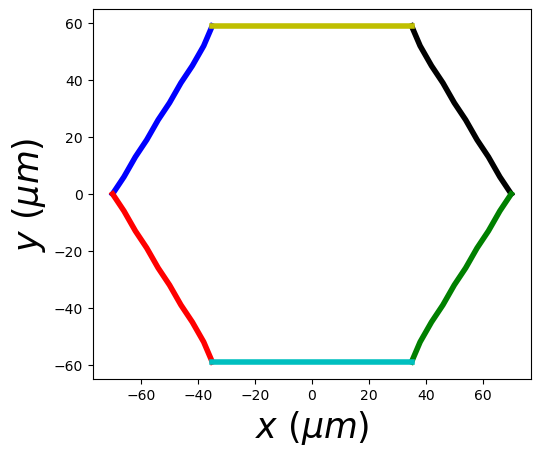

In [38]:
# nhex = int(Lx/dx)
nhex = 10
#assigning y points
iy0 = iy1 = int(Ly_new/dy)
print(iy0)
print(dy)
print(Ly_new)
iy2 = iy5 = 0
iy3 = -iy1
iy4 = -iy0
#making x arrays
iy01 = np.linspace(iy0,iy1,nhex).astype(int)
iy12 = np.linspace(iy1,iy2,nhex).astype(int)
print(iy12)
iy32 = np.linspace(iy3,iy2,nhex).astype(int)
iy43 = np.linspace(iy4,iy3,nhex).astype(int)
iy54 = np.linspace(iy5,iy4,nhex).astype(int)
iy50 = np.linspace(iy5,iy0,nhex).astype(int)
#assigning x points
ix1 = ix3 = int(Lx/dx)
ix0 = ix4 = -ix1
ix2 = int(Lx_new/dx)
ix5 = -ix2
#making y arrays
ix01 = np.linspace(ix0,ix1,nhex).astype(int)
ix12 = np.linspace(ix1,ix2,nhex).astype(int)
print(ix12)
ix32 = np.linspace(ix3,ix2,nhex).astype(int)
ix43 = np.linspace(ix4,ix3,nhex).astype(int)
ix54 = np.linspace(ix5,ix4,nhex).astype(int)
ix50 = np.linspace(ix5,ix0,nhex).astype(int)

#my new plot
fig,ax = plt.subplots()
ax.set_aspect('equal')
# CS = ax.contour(x.magnitude,y.magnitude,un.T)
ax.set_xlabel(r'$x$ ($\mu m$)', fontsize=fontsize)
ax.set_ylabel(r'$y$ ($\mu m$)', fontsize=fontsize)
# fig.colorbar(CS)
# xvec = (x[ixboxmax].magnitude,x[ixboxmax_new].magnitude)
# yvec = (y[iyboxmax_new].magnitude,0)
plt.plot(ix12,iy12,color='k',linewidth=linewidth)
# xvec = (x[ixboxmin_new].magnitude,x[ixboxmin].magnitude)
# yvec = (0,y[iyboxmax_new].magnitude)
plt.plot(ix50,iy50,color='b',linewidth=linewidth)
# xvec = (x[ixboxmin_new].magnitude,x[ixboxmin].magnitude)
# yvec = (0,y[iyboxmin_new].magnitude)
plt.plot(ix54,iy54,color='r',linewidth=linewidth)
# xvec = (x[ixboxmax].magnitude,x[ixboxmax_new].magnitude)
# yvec = (y[iyboxmin_new].magnitude,0)
plt.plot(ix32,iy32,color='g',linewidth=linewidth)
# xvec = (x[ixboxmin].magnitude,x[ixboxmax].magnitude)
# yvec = (y[iyboxmin_new].magnitude,y[iyboxmin_new].magnitude)
plt.plot(ix43,iy43,color='c',linewidth=linewidth)
# xvec = (x[ixboxmin].magnitude,x[ixboxmax].magnitude)
# yvec = (y[iyboxmax_new].magnitude,y[iyboxmax_new].magnitude)
plt.plot(ix01,iy01,color='y',linewidth=linewidth)

In [36]:
# Initialize u0 and un as ones/zeros matrices 
u0 = np.ones([nx, ny])*udirichlet_mag # old u values

    #Initialize the state of the vapor field

    # Propagate forward a bunch of times
un = cp(u0)

for i in range(ntimes):
        un = VFD.propagate_hexagon(un,ix01,ix12,ix32,ix43,ix54,ix50,iy01,iy12,iy32,iy43,iy54,iy50,udirichlet_mag,uneumann_mag,Deff)  

59
2.840909090909091 micrometer
170.45454545454544 micrometer
[59 52 45 39 32 26 19 13  6  0]
[35 38 42 46 50 54 58 62 66 70]


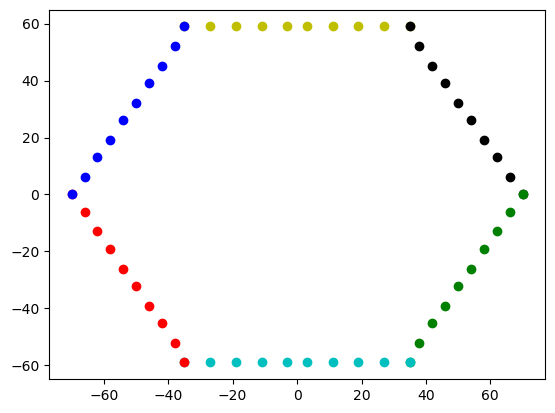

In [37]:
plt.figure()
plt.plot(ix01,iy01,'yo')
plt.plot(ix12,iy12,'ko')
plt.plot(ix32,iy32,'go')
plt.plot(ix43,iy43,'co')
plt.plot(ix54,iy54,'ro')
plt.plot(ix50,iy50,'bo')

### Doing this again to sort out the relaxation time after a perturbation
Assuming "un" has the last time step of the last L-value.

In [15]:
# # Times after perturbation
# ntimes_after_perturbation = ntimes
# tkeep = np.linspace(0,ntimes_after_perturbation*dt,ntimes_after_perturbation)

# # This is the perturbation factor
# pertfactor = 1.1

# # The unperturbed run
# un_unperturbed = cp(un)
# ukeep_unperturbed = []
# ukeepL_unperturbed = []

# for i in range(ntimes_after_perturbation):
#     ukeep_unperturbed.append(un_unperturbed[nxmid,nymid+boxrady])
#     ukeepL_unperturbed.append(un_unperturbed[ixbox,nymid+boxrady][0])
#     un_unperturbed = propagate(un_unperturbed,ixbox,iybox,udirichlet_mag,uneumannx_mag,uneumanny_mag,Dxeff,Dyeff)

# # The perturbed run
# un_perturbed = cp(un)
# un_perturbed[nxmid,nymid+boxrady] *= pertfactor
# wider = 5
# for iwider in range(1,wider):
#     un_perturbed[nxmid-iwider,nymid+boxrady] *= pertfactor
#     un_perturbed[nxmid+iwider,nymid+boxrady] *= pertfactor
# ukeep_perturbed = []
# un_perturbed_initial = cp(un_perturbed)
# ukeepL_perturbed = []
# for i in range(ntimes_after_perturbation):
#     ukeep_perturbed.append(un_perturbed[nxmid,nymid+boxrady])
#     ukeepL_perturbed.append(un_perturbed[ixbox,nymid+boxrady][0])
#     un_perturbed = propagate(un_perturbed,ixbox,iybox,udirichlet_mag,uneumannx_mag,uneumanny_mag,Dxeff,Dyeff)

In [16]:
# # Taking a look at the profile results
# uslice_unperturbed_final = un_unperturbed[ixbox,nymid+boxrady]
# uslice_perturbed_final = un_perturbed[ixbox,nymid+boxrady]
# uslice_perturbed_initial = un_perturbed_initial[ixbox,nymid+boxrady]
# plt.figure()
# plt.plot(xshifted,uslice_unperturbed_final,'s',label='unperturbed (final)')
# plt.plot(xshifted,uslice_perturbed_final,'x',label='perturbed (final)')
# plt.plot(xshifted,uslice_perturbed_initial,'o',label='perturbed (initial)')
# plt.grid(True)
# plt.legend()

# # Taking a look at pressures at the center over time
# ukeep_perturbed_nparray = np.array(ukeep_perturbed)
# ukeep_unperturbed_nparray = np.array(ukeep_unperturbed)
# deltaPressure = (ukeep_perturbed_nparray-ukeep_unperturbed_nparray)
# plt.figure()
# plt.plot(tkeep,deltaPressure)
# plt.xlabel('time (microseconds)')
# plt.grid(True)
# tau = tkeep[np.argmin(np.abs(deltaPressure/deltaPressure[0]-.5))]
# print('Approximate half-life =',tau)

# # Taking a look at center reductions over time
# ukeepL_perturbed_nparray = np.array(ukeepL_perturbed)
# ukeepL_unperturbed_nparray = np.array(ukeepL_unperturbed)
# c_rx_percent_perturbed = (ukeepL_perturbed_nparray-ukeep_perturbed_nparray)/ukeepL_perturbed_nparray*100
# c_rx_percent_unperturbed = (ukeepL_unperturbed_nparray-ukeep_unperturbed_nparray)/ukeepL_unperturbed_nparray*100
# plt.figure()
# plt.plot(tkeep,c_rx_percent_perturbed,label='perturbed')
# plt.plot(tkeep,c_rx_percent_unperturbed,label='unperturbed')
# plt.xlabel('time (microseconds)')
# plt.ylabel(r'$c_r$ (%)')
# plt.legend()
# plt.grid(True)

# # Taking a look at center reductions as a % of the unperturbed over time
# c_rx_percent_difference = (c_rx_percent_perturbed-c_rx_percent_unperturbed)/c_rx_percent_unperturbed*100
# plt.figure()
# plt.plot(tkeep,c_rx_percent_difference,label='difference')
# plt.xlabel('time (microseconds)')
# plt.grid(True)
# # plt.ylim([-10,10])
# tau = tkeep[np.argmin((c_rx_percent_difference+5)**2)]
# print('95% recovery time =',tau)

### Lesson of the perturbation code
The goal of the pertubation code is to see whether it's justified to ignore (as the continuum code does) the impact layer formation on a crystal surface might have on the overlying vapor field. I'm judging this by comparing two numbers. One is $\tau_{vap,pert}$, the time it takes for a spot in the vapor field to recover from a perturbation; we can get that from this vaporfield code. The other is $\tau_{res}$, the residence time a layer lingers over a given location; we can get that from the continuum model code.

It seems, from the figure above, it takes  a perturbation in the vapor field above our growing crystal $0.1 \ \mu s$ to recover $95\%$ of the pre-perturbation $c_r$. So we'll say $\tau_{vap,pert} \approx 0.1 \ \mu s$.

By comparison, layer residence times in the continuum code are $\tau_{res}\approx 5 \mu s$, for similar parameters. So that's not very close. 

In [17]:
# ### Connecting to the continuum code ...
# nmpermonolayer = AssignQuantity(0.3,'nanometer')
# print('nmpermonolayer = ', nmpermonolayer)
# growthrate = g_ice
# print('growthrate = ', growthrate)
# growthrate = g_ice/nmpermonolayer; growthrate.ito('1/second')
# print('growthrate = ', growthrate)
# HLS = growthrate*Lx
# HLS.ito('micrometer/microsecond')
# print('HLS = ', HLS)
# print()

# # Guessing at lambda from SEM
# dz = AssignQuantity(1,'micrometer')
# dx = AssignQuantity(40,'micrometer')
# dzdx = dz/dx
# dlayersdx = dzdx/nmpermonolayer
# dlayersdx.ito('1/micrometer')
# lambdabar = 1/dlayersdx
# residence_time = lambdabar/HLS
# print('SEM:')
# print('    lambda = ', lambdabar)
# print('    Residence time SEM = ', residence_time)
# print()

# # CM
# lambdabar = AssignQuantity(3,'micrometer')
# residence_time = lambdabar/HLS
# print('CM:')
# print('    lambda = ', lambdabar)
# print('    residence_time = ', residence_time)

### Fitting $c_r$

For D =  34908.31943863489 micrometer ** 2 / microsecond, I get np.flip(px) = [-0.03331184  0.00657218]

